# Procesamiento de secuencias con redes neuronales recurrentes

- En general, muchos problemas en ciencia de datos, requieren del procesado de datos sencuenciales, generalmente asociados al tiempo (series de tiempo).

- En ese sentido, sea la serie de datos $\{x_t\in\mathbb{R}\}_{t=1}^T$.

- Suponga que se define el modelo predictivo probabilístico de la forma:

$$x_t \sim P(x_t|x_{t-1},\dots,x_1)$$

- En general, el estudio de datos secuenciales se puede atacar desde dos aproximaciones básicas: i) modelos autorregresivos , y ii) modelos autorregresivos de variable latente.

# Modelos autorregresivos

- Dichos modelos fijan una dependencia temporal de orden $\tau$.

- Por ende, el número de puntos requeridos para realizar predicciones para $t > \tau$ se mantiene fijo, dado que se asume:

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

# Modelos autorregresivos de variable latente

- Buscan preservar alguna representación latente (memoría) $h_t$ de las observaciones pasadas, y busca actualizar (predecir) la secuencia $x_t$ y la variable latente $h_t$, de la forma:

$$\hat{x}_t = P(x_t|h_t)$$

$$h_t = g(h_{t-1},x_{t-1})$$

![autorregresivo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/autorregresivo.png?raw=1)

**Nota**: $h_t$ no es observable (latente), por ende debe estimarse desde los datos.

- En estadística, el concepto de dinámica que no cambia (patrón regular) se conoce como estacionario. En este sentido, podemos tener un estimado de la secuencia completa utilizando un modelo probabilístico de la forma:

$$P(x_1,x_2,\dots,x_T) = \prod^T_{t=1}P(x_t|x_{t-1},\dots,x_1)$$
donde el estimado de la probabilidad condicional se puede realizar mediante regresores o clasficadores para eventos continuos o discretos, respectivamente.



# Modelos Markovianos

- En los modelos autorregresivos la estimación de $x_t$ se basa en una ventana de tamaño $\tau$, de la forma $x_{t-1},\dots,x_{t-\tau}$.

- Para cuando dicha aproximación es correcta, se dice que la secuencia de datos cumple con la condición Markoviana.

- Para $\tau=1$, se tiene un modelo de Markov de primer orden:

$$P(x_1,x_2,\dots,x_T)=\prod_{t=1}^T P(x_t|x_{t-1})$$
con $P(x_1|x_0)=P(x_1).$





# Ejercicio 1:

- Consultar el modelo y principio de optimización de los modelos de media móvil ([Moving average - MA](https://en.wikipedia.org/wiki/Moving-average_model)), autorregresivos de media móvil ([Autorregresive moving average - ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)) y autorregresivo integrado de media móvil ([Autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)). Cuáles son sus relaciones con los modelos Markovianos?.

### Ejercicio 1 – Modelos MA, ARMA, ARIMA y relación con modelos Markovianos

Un **modelo de media móvil MA(q)** describe una serie temporal como una combinación lineal de un ruido blanco actual y de sus errores pasados:  
\[
X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q},
\]
donde \(\varepsilon_t\) es ruido blanco y \(\theta_i\) son parámetros. Un **modelo autorregresivo AR(p)**, en cambio, expresa la serie como combinación lineal de sus propios valores pasados:  
\[
X_t = \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \varepsilon_t.
\]

El **modelo ARMA(p,q)** combina ambas ideas: parte autorregresiva (AR) + parte de media móvil (MA) en una sola ecuación. Cuando la serie no es estacionaria, se introduce la componente integrada: se aplican diferencias \(\nabla^d X_t\) hasta volverla aproximadamente estacionaria. Eso lleva al modelo **ARIMA(p,d,q)** (Autoregressive Integrated Moving Average), donde \(d\) es el número de diferencias aplicadas antes de ajustar un ARMA sobre la serie transformada.

En la práctica, los parámetros de estos modelos se ajustan usualmente por **máxima verosimilitud** o por **mínimos cuadrados**, buscando los valores de \(\phi_i\), \(\theta_j\) (y \(\mu\)) que minimicen el error de predicción o que maximicen la probabilidad de observar los datos medidos bajo el modelo. Es decir, el principio de optimización consiste en encontrar la combinación de parámetros que mejor explique la serie observada en términos de sus errores de predicción.

La relación con los **modelos Markovianos** está en la **dependencia local en el tiempo**: en un AR(p), el valor \(X_t\) depende solo de los últimos \(p\) valores \((X_{t-1}, \dots, X_{t-p})\), lo que equivale a un **proceso de Markov de orden p** si consideramos como “estado” el vector formado por esos retardos. De forma similar, los modelos MA(q) y ARMA/ARIMA pueden reinterpretarse como procesos Markovianos de orden finito si ampliamos el estado para incluir errores pasados o variables auxiliares. En resumen, estos modelos suponen que, dado un número finito de valores pasados (o estados extendidos), el futuro es condicionalmente independiente del resto del pasado, que es precisamente la idea central de los procesos de Markov.


# Redes neuronales recurrentes - Recurrent neural networks (RNN)

- Hasta el momento hemos trabajado con datos estructurados tipo tabla, en donde las muestras se asumen independientes e identicamente distribuidas (i.i.d.).

- Sin embargo, para datos secuenciales, la suposición i.i.d no es apropiada, y se requiren de arquitecturas que codifiquen dicha secuencialidad.

- Por ejemplo, en el caso de datos tipo imagen, la relación espacial debe ser codificada apropiadamente, como en el caso de las arquitecturas convolucionales ([Convolutional Neural Networks](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)).

- En este sentido, las RNN pretenden explotar la codificación mediante variables latentes, para aproximar el modelado de la incertidumbre de la secuencia como:


$$P(x_t|x_{t-1},\dots,x_1)\approx P(x_t|h_{t-1})$$

donde el estado oculto $h_{t-1}$ (hidden state) codifica la información relevante de la secuencia hasta $t-1$.

- Además, el estado oculto en $t$ se puede calcular a partir de $x_t$ y $h_{t-1},$ como:

$$h_t=f(x_t,h_{t-1})$$

**Nota**: se podría utilizar como $h_t$ todo el vector de datos $x_t,x_{t-1},\dots,x_1$; no obstante, el costo computacional y de memoría sería muy alto.

## Las RNN son redes neuronales con estados ocultos!

- Considere una matriz (mini-lote) de $P$ características desde datos secuenciales $\mathbf{X}_t\in\mathbb{R}^{N\times P}$, es decir, tenemos $N$ trayectorias con $P$ mediciones de una secuencia en el instante $t$.

- Sea $\mathbf{H}_t\in\mathbb{R}^{N \times h}$ la variable oculta (latente) para el instante $t$, la estimación de dicha variable respecto a la entrada actual y a la variable oculta en $t-1$ se puede modelar mediante RNN como:

$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}+\mathbf{H}_{t-1}\mathbf{S} + \mathbf{b}),$$

donde $\mathbf{W}\in\mathbb{R}^{P \times h},$ $\mathbf{S}\in\mathbb{R}^{h \times h},$ $\mathbf{b}\in\mathbb{R}^{h}$ y $\phi(\cdot)$ es una función de activación no lineal.

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto de la forma:

$$\mathbf{O}_t = \mathbf{H}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$

**Esquema de una RNN con un estado oculto:**

![rnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn.png?raw=1)



- A continuación se presenta algunos ejemplos sobre Tensorflow para RNN.

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Generamos el conjunto de series de tiempo a analizar

In [2]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [3]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


$[y_{t+P},\dots,y_{t}] = f(y_{t-1},\dots,y_{t-\tau},x_{t},x_{t-1},\dots,x_{t-\tau})$

In [4]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

Generamos la gráfica de las series de tiempo creadas

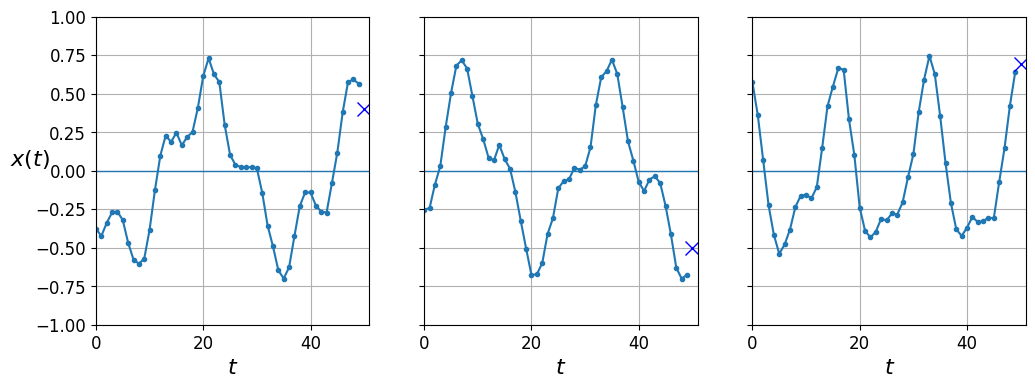

In [5]:
#-------------------------------------------------------------------------------
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()
#-------------------------------------------------------------------------------

# Predicción ingenua (solo predecir el último valor):

- Para ilustrar el concepto de secuencialidad, utilizaremos un predictor ingenuo, en donde la salida actual sería igual al valor en el instante anterior:

$$x_t = x_{t-1}$$

In [6]:
#-------------------------------------------------------------------------------
# asumimos que el valor ha estimar es el último elemento de la serie----------------
y_pred = X_test[:, -1]
#-------------------------------------------------------------------------------
# calculamos el MSE entre el y_valid vs. y_pred---------------------------------

print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.1811275 %


- El error cálculado no es tan grande aparentemente.

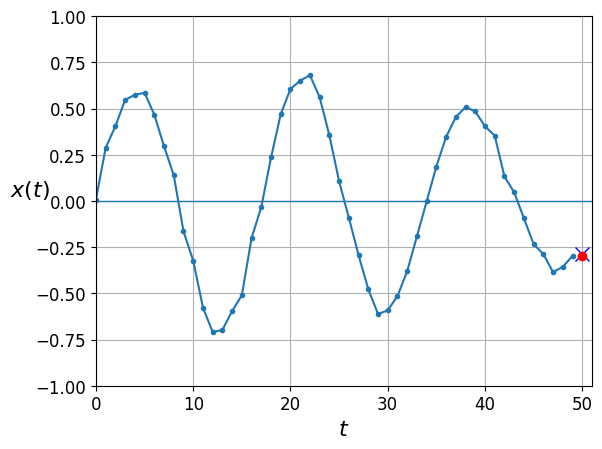

In [7]:
#-------------------------------------------------------------------------------
# graficamos valor estimado----------------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicción lineal

- Ahora utilizaremos un modelo lineal simple.

- Recuerde que como generamos ventanas, podrimos entender esta aproximación como un modelo autorregresivo simple (sin variables latentes):

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

donde la estimación de la condicional se realiza mediante un regresor con capas densas.



$\mathbf{X}=[\mathbf{x}_n]\in \mathbb{R}^{N \times P}$

$\mathbf{x}_n =[y_{n-1},y_{n-2},\dots, y_{n-\tau}]$

$\mathbf{y}\in \mathbb{R}^T$

$f(\mathbf{x}_n)=\mathbf{x}_n\mathbf{w}=x_{n1}w_1+\dots+x_{nP}w_P$

$f(\mathbf{x}_n)= y_{n-1}w_1+\dots+y_{n-\tau}w_P = \hat{y}_n$

$P = \tau$

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

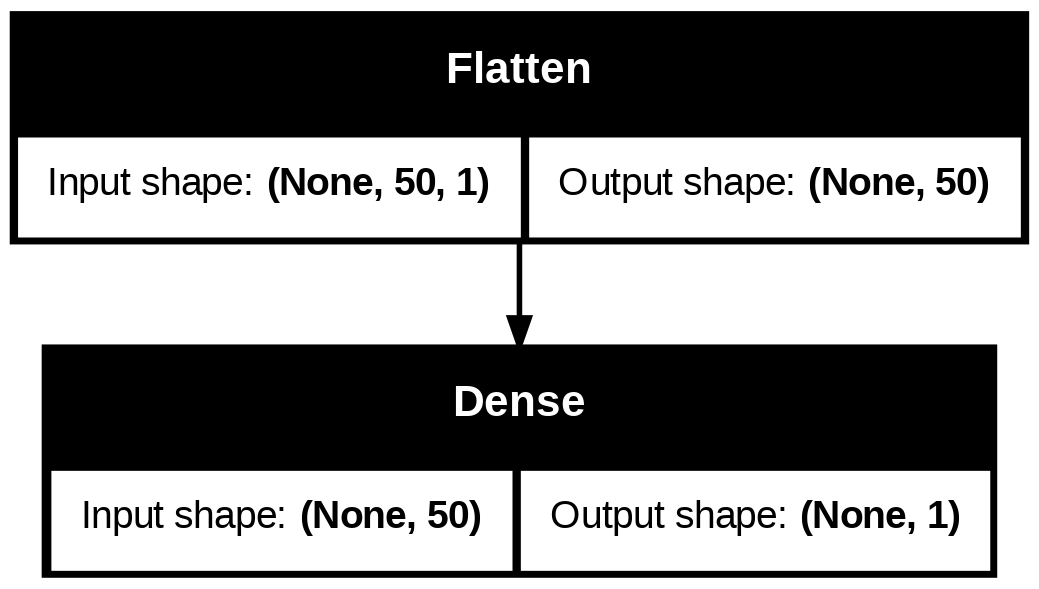

In [8]:
#-------------------------------------------------------------------------------
# definimos un modelo secuencial------------------------------------------------
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
#-------------------------------------------------------------------------------
model.summary()
#-------------------------------------------------------------------------------
keras.utils.plot_model(model, "my_model_series.png", show_shapes=True)
#-------------------------------------------------------------------------------

Compilamos y ajustamos el modelo usando los datos de train y validation

In [9]:
epochs = 20
#-------------------------------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4898 - val_loss: 0.1046
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0877 - val_loss: 0.0562
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0504 - val_loss: 0.0353
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0329 - val_loss: 0.0249
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0237 - val_loss: 0.0194
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0185 - val_loss: 0.0161
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0154 - val_loss: 0.0140
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0133 - val_loss: 0.0124
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0105 - val_loss: 0.0098
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [10]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 0.46241724 %


El resultado es mucho mejor que el predictor ingenuo.

Graficamos el desempeño del modelo secuencial

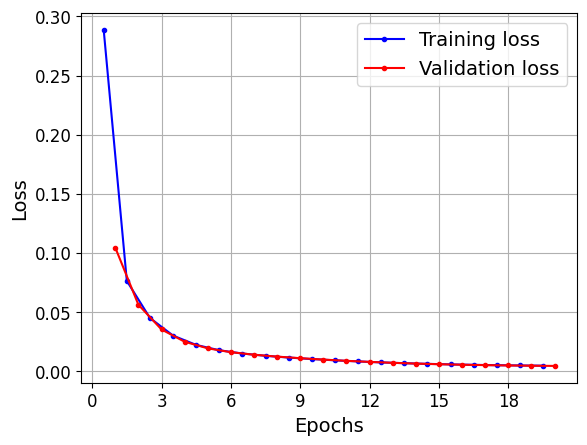

In [11]:
#-------------------------------------------------------------------------------
# definimos una función para plot de curvas de aprendizaje----------------------
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
#-------------------------------------------------------------------------------
# llamamos función de plot------------------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

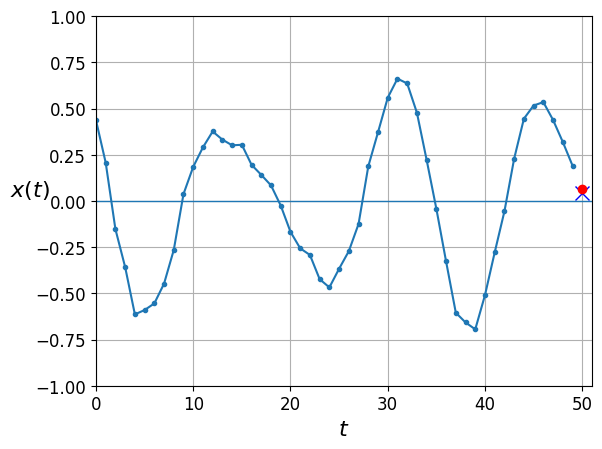

In [12]:
#-------------------------------------------------------------------------------
# pintamos series y predicciones------------------------------------------------
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicciones con RNN

- Keras tiene implementado las [capas simples de RNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/).

- Por defecto la activación no lineal utilizada es la `tanh`, aunque se puede trabajar con las vistas en módulos anteriores.

- En este caso se define una única capa RNN con una neurona, dado que tenemos una única salida a predecir.

In [13]:
#-------------------------------------------------------------------------------
# definimos modelo secuencial de RNN simple-------------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1], )
])
#-------------------------------------------------------------------------------
# compilamos el modelo RNN------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
#-------------------------------------------------------------------------------
# entrenamos el modelo y lo ajustamos con los datos de valid--------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4000 - val_loss: 0.2502
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1988 - val_loss: 0.1182
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0920 - val_loss: 0.0458
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0353 - val_loss: 0.0182
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0120
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0

In [14]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
MSE: 1.1330948 %


Graficamos el performance de la Simple RNN

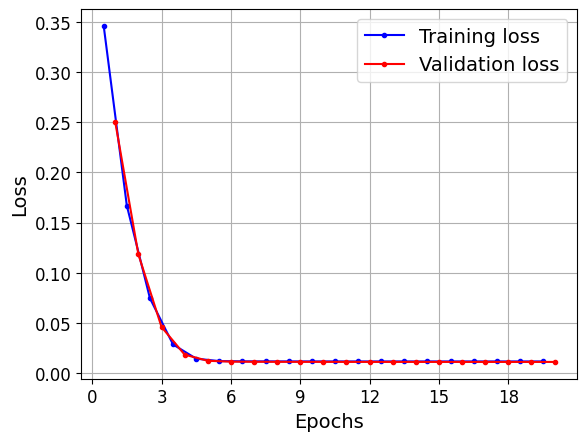

In [15]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

Se analiza la predicción

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


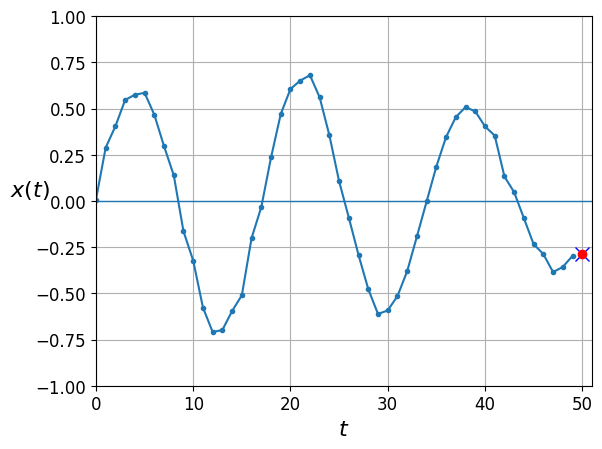

In [16]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_test)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Deep RNNs

- Un modelo profundo de RNN contiene $L$ capas ocultas.

- Sobre cada capa oculta, el estado oculto es actualizado y se pasa al siguiente instante de tiempo de la capa actual y de la capa siguiente:

![deeprnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/deeprnn.png?raw=1)

- El modelo recurrente profundo se define entonces como:

$$\mathbf{H}^{(l)}_t = \phi_l\left(\mathbf{H}^{(l-1)}_t \mathbf{W}^{(l)}+\mathbf{H}^{(l)}_{t-1}\mathbf{S}^{(l)} + \mathbf{b}^{(l)}\right),$$

donde $\mathbf{W}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_l},$ $\mathbf{S}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_{l-1}},$ $\mathbf{b}\in\mathbb{R}^{h_l}$ y $\phi_l(\cdot)$ es una función de activación no lineal. $\mathbf{H}^{(0)}_t=\mathbf{X}_t$

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto en la capa oculta $L$:

$$\mathbf{O}_t = \mathbf{H}^{(L)}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h_L\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$


**Nota:** para aplicar la capa densa de la salida, se puede utilizar una capa `SimpleRNN(1)` con una neurona, o una capa densa aplicada desde la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para preservar la temporalidad de los datos.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

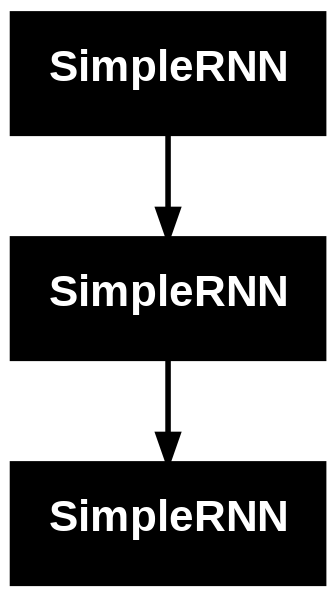

In [17]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

# Ejercicio 2

- Para el modelo definido, determine los tamaños de las matrices y vectores de bias en cada capa.

**Nota**: Utilice el método `model.layers[l].get_weights()`

### Ejercicio 2 – Tamaños de matrices de pesos y vectores de bias

En este ejercicio se pide inspeccionar los tamaños de las matrices de pesos y los vectores de bias de cada capa del modelo definido anteriormente. Para ello se usa el método `model.layers[l].get_weights()`, que devuelve una lista de arreglos de numpy con los parámetros entrenables de la capa. En una capa `SimpleRNN`, por ejemplo, normalmente aparecen tres tensores: la matriz de pesos de entrada a estado, la matriz de pesos de estado a estado (recurrente) y el vector de bias. Recorriendo `model.layers` e imprimiendo la forma (`shape`) de cada uno de estos tensores, se puede verificar la dimensión exacta de los parámetros que está aprendiendo la red.


In [18]:
# === Ejercicio 2: inspeccionar tamaños de pesos y bias en cada capa ===

for i, layer in enumerate(model.layers):
    print(f"\nCapa {i}: {layer.name} ({layer.__class__.__name__})")

    # pesos y bias de la capa
    weights = layer.get_weights()

    if not weights:
        print("  -> La capa no tiene pesos entrenables (por ejemplo, capa de entrada o capa de activación).")
        continue

    for j, w in enumerate(weights):
        print(f"  Parámetro {j}: shape = {w.shape}")



Capa 0: simple_rnn_1 (SimpleRNN)
  Parámetro 0: shape = (1, 20)
  Parámetro 1: shape = (20, 20)
  Parámetro 2: shape = (20,)

Capa 1: simple_rnn_2 (SimpleRNN)
  Parámetro 0: shape = (20, 20)
  Parámetro 1: shape = (20, 20)
  Parámetro 2: shape = (20,)

Capa 2: simple_rnn_3 (SimpleRNN)
  Parámetro 0: shape = (20, 1)
  Parámetro 1: shape = (1, 1)
  Parámetro 2: shape = (1,)


In [19]:
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.1313 - val_loss: 0.0083
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

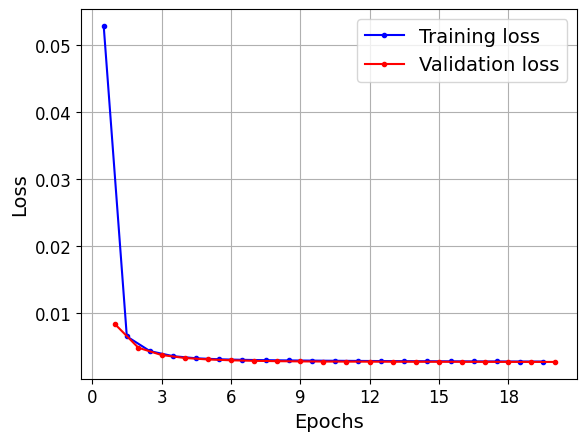

In [20]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [21]:
y_train.shape

(7000, 1)

In [22]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
#print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------
y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


(1000, 1)

Graficamos el performance de la Deep RNN

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


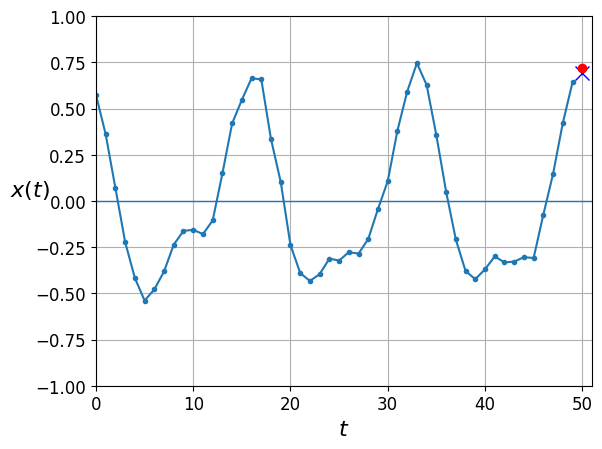

In [23]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_valid)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicir un horizonte más lejano

- Si concatenamos las predicciones de a una muestra, para generar salidas con horizontes más lejanos, podemos estar propangando el error!

In [24]:
#-------------------------------------------------------------------------------
# definimos nueva semilla aleatoria---------------------------------------------
np.random.seed(43) #
#-------------------------------------------------------------------------------
# generamos nueva series de tiempo----------------------------------------------
series       = generate_time_series(1, n_steps + 10)     # horizonte de 10 valores en el tiempo
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X            = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
Y_pred = X[:, n_steps:]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [25]:
#-------------------------------------------------------------------------------
# observamos nuevas dimensiones de Y_pred---------------------------------------
Y_pred.shape #horizonte de 10 valores en el tiempo
#-------------------------------------------------------------------------------

(1, 10, 1)

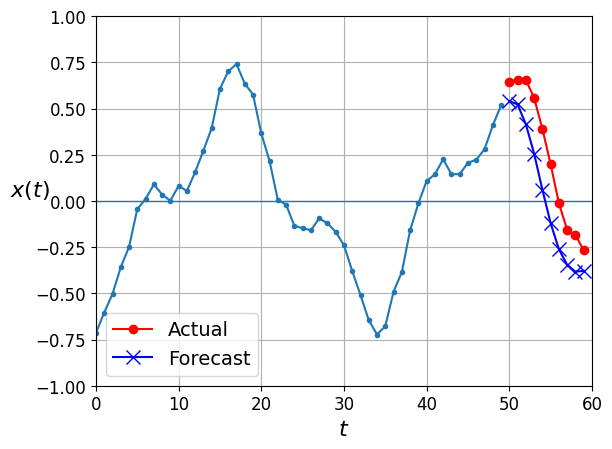

In [26]:
#-------------------------------------------------------------------------------
# definimos función para pintar forecast----------------------------------------
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
#-------------------------------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Lo mejor es entrenar un modelo que incluya como salida target los siguientes $T$ valores a predicir en el horizonte.

- Se requiere entonces generar nuevamente la secuencia con $T-1$ pasos más en el tiempo.

In [27]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
print('Series dimension:',series.shape)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, Y_train.shape)
print('Valid dimensions:',X_valid.shape, Y_valid.shape)
print('Test dimensions:',X_test.shape, Y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 60, 1)
Train dimensions: (7000, 50, 1) (7000, 10)
Valid dimensions: (2000, 50, 1) (2000, 10)
Test dimensions: (1000, 50, 1) (1000, 10)


Predicción de los siguientes 10 valores (uno a uno y concatenar):

In [28]:
#-------------------------------------------------------------------------------
# realizamos predicción usando modelo Deep RNN----------------------------------
del X
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
# obtenemos las predicciones de los siguientes 10 valores-----------------------
Y_pred = X[:, n_steps:, 0]
#-------------------------------------------------------------------------------
print('Y_pred dimensions:', Y_pred.shape)
#-------------------------------------------------------------------------------

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Y_pred dimensions: (2000, 10)


- Error de predicción con horizontes mayores a 1 concatenando salidas:

In [29]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_valid, Y_pred))*100,'%')
#-------------------------------------------------------------------------------

3.1990595 %


Ahora se crea una RNN que permita predecir los siguientes 10 valores en una sola evaluación (predicción multi-salida):

In [30]:
#-------------------------------------------------------------------------------
# definimos semillas aleatorias-------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
# definimos el modelo secuencial multi-salida-----------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) # capa densa para estimar los siguientes 10 valores
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0943 - val_loss: 0.0266
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0239 - val_loss: 0.0174
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0168 - val_loss: 0.0144
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0125 - val_loss: 0.0108
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0115 - val_loss: 0.0098
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 

In [31]:
#-------------------------------------------------------------------------------
# generamos nuevos datos, con nueva semilla aleatoria---------------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva serie de tiempo-----------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
#-------------------------------------------------------------------------------
print('X_new dimensions:',X_new.shape)
print('Y_new dimensions:',Y_new.shape)
#-------------------------------------------------------------------------------
# hacemos predicción de los 10 últimos valores----------------------------------
Y_pred       = model.predict(X_new)[..., np.newaxis]
print('Y_pred dimensions:',Y_pred.shape)
#-------------------------------------------------------------------------------

X_new dimensions: (1, 50, 1)
Y_new dimensions: (1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Y_pred dimensions: (1, 10, 1)


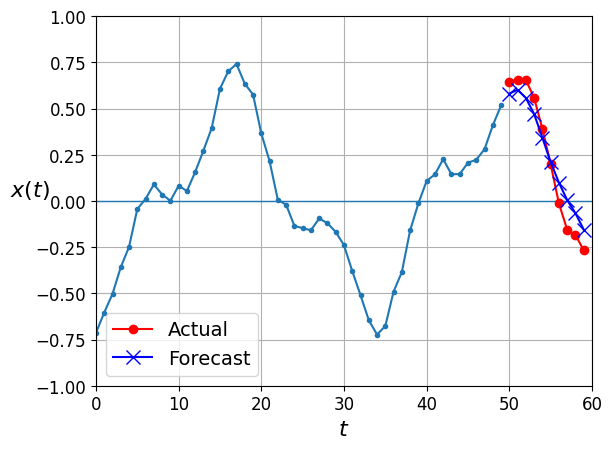

In [32]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- El error de predicción mejora:

In [33]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.9165398 %


# El problema de las dependencias a largo plazo

- Uno de los atractivos de los RNN es la idea de conectar la información anterior a la tarea actual. Si los RNN pudieran hacer esto, serían extremadamente útiles.

- A veces, solo necesitamos mirar información reciente para realizar la tarea actual.

- Por ejemplo, considere un modelo de lenguaje que intenta predecir la siguiente palabra basándose en las anteriores. Si estamos tratando de predecir la última palabra en la oración:

 "las nubes están en el cielo",

no necesitamos ningún contexto adicional; es bastante obvio que la siguiente palabra será **cielo**.

- En tales casos, donde la brecha entre la información relevante y el lugar que se necesita es pequeña, los RNN pueden aprender a usar la información del pasado.

![rnn_corto](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_corto.png?raw=1)

- Pero también hay casos en los que necesitamos más contexto. Considere intentar predecir la última palabra del texto:

"Crecí en Francia ... hablo francés con fluidez",

la información reciente sugiere que la siguiente palabra es probablemente el **nombre de un idioma**, pero si queremos delimitar qué idioma, necesitamos el contexto de Francia, desde más atrás.

- Entonces, la brecha entre la información relevante y el punto donde se necesita puede ser grande.

![rnn_largo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_largo.png?raw=1)

- En teoría, los RNN son capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, las RNN no parecen ser capaces de aprenderlos.

# [LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): Long short term memory

- La LSTM pretende aprender dependencias largas.

- En general, en LSTM, y su extensión GRU, buscan crear mecanismos que permitan identificar cuando el estado oculto debe ser actualizado y cuando reseteado.

- A diferencia de una capa RNN simple, las LSTMs presenta cuatro (4) capas interactuando:


![lstm](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/lstm.png?raw=1)

con:

$$\mathbf{I}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xi}+\mathbf{H}_{t-1}\mathbf{W}_{hi}+\mathbf{b}_i\right)$$
$$\mathbf{F}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xf}+\mathbf{H}_{t-1}\mathbf{W}_{hf}+\mathbf{b}_f\right)$$
$$\mathbf{O}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xo}+\mathbf{H}_{t-1}\mathbf{W}_{ho}+\mathbf{b}_o\right)$$
$$\tilde{\mathbf{C}}_t = \tanh\left(\mathbf{X}_t\mathbf{W}_{xc}+\mathbf{H}_{t-1}\mathbf{W}_{hc}+\mathbf{b}_c\right)$$
$${\mathbf{C}}_t = \mathbf{F}_t \odot \mathbf{C}_{t-1} + \mathbf{I}_t \odot \tilde{\mathbf{C}}_t $$
$${\mathbf{H}}_t = \mathbf{O}_t \odot \tanh{(\mathbf{C}_{t})} $$


donde $\mathbf{W}_{xi},\mathbf{W}_{xf},\mathbf{W}_{xo}, \mathbf{W}_{xc}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hi},\mathbf{W}_{hf},\mathbf{W}_{ho},\mathbf{W}_{hc}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{i},\mathbf{b}_{f},\mathbf{b}_{o}, \mathbf{b}_{c}\in\mathbb{R}^{h}$.

- $\mathbf{I}_t$ busca codificar "cuanto" considerar de los datos nuevos y $\mathbf{F}_t$ que tando retenemos de los datos del pasado.

- Si la compuerta de salida se aproxima a 1, pasamos toda la información de la memoría al predictor, pero, si la compuerta de la salida aproxima a 0, se retiene la información en la celda de memoría.


In [34]:
#-------------------------------------------------------------------------------
# generamos los datos-----------------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# generamos series de tiempo----------------------------------------------------
n_steps = 50
series  = generate_time_series(10000, n_steps + 10)
print('Series dimensions:',series.shape)
#-------------------------------------------------------------------------------
# partimos los datos en train/valid/test----------------------------------------
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test  = series[9000:, :n_steps]
print('X_train dimensions:',X_train.shape)
print('X_valid dimensions:',X_valid.shape)
print('X_test dimensions:',X_test.shape)
#-------------------------------------------------------------------------------
# definimos nuevos Y------------------------------------------------------------
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
print('Y dimensions:',Y.shape)
#-------------------------------------------------------------------------------
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test  = Y[9000:]
#-------------------------------------------------------------------------------
print('Y_train dimensions:', Y_train.shape)
print('Y_valid dimensions:',Y_valid.shape)
print('Y_test dimensions:',Y_test.shape)
#-------------------------------------------------------------------------------

Series dimensions: (10000, 60, 1)
X_train dimensions: (7000, 50, 1)
X_valid dimensions: (2000, 50, 1)
X_test dimensions: (1000, 50, 1)
Y dimensions: (10000, 50, 10)
Y_train dimensions: (7000, 50, 10)
Y_valid dimensions: (2000, 50, 10)
Y_test dimensions: (1000, 50, 10)


**Nota**: En la capa de salida se puede utilizar una capa densa de 10 neuronas (horizonte de 10 valores). No obstante, debe aplicarse la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para aplicar la operación densa sobre cada tramo de tiempo.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 10)       │           210 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,250 (20.51 KB)

 Trainable params: 5,250 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

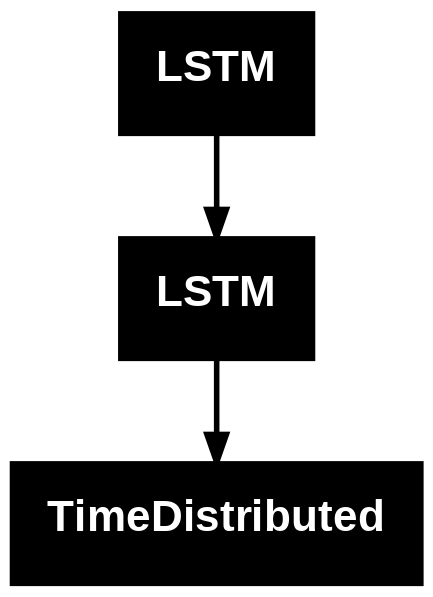

In [35]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mse(Y_true[:, -1], Y_pred[:, -1])
#-------------------------------------------------------------------------------
# definimos el modelo secuencial con 2 capas LSTM-------------------------------
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.summary()
tf.keras.utils.plot_model(model)

In [36]:
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
#-------------------------------------------------------------------------------
# entrenamos y validamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - last_time_step_mse: 0.0873 - loss: 0.0976 - val_last_time_step_mse: 0.0352 - val_loss: 0.0544
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - last_time_step_mse: 0.0305 - loss: 0.0501 - val_last_time_step_mse: 0.0206 - val_loss: 0.0418
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0190 - loss: 0.0397 - val_last_time_step_mse: 0.0161 - val_loss: 0.0363
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0157 - loss: 0.0352 - val_last_time_step_mse: 0.0145 - val_loss: 0.0334
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0142 - loss: 0.0327 - val_last_time_step_mse: 0.0134 - val_loss: 0.0314
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - last_time_step_mse: 0.0133 - loss: 0.0309 - val_last_time_step_mse: 0.0127 - val_loss: 0.0301
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0124 - loss: 0.0297 - val_las

In [37]:
#-------------------------------------------------------------------------------
# evaluamos el modelo sobre los datos de Valid----------------------------------
model.evaluate(X_test, Y_test)
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - last_time_step_mse: 0.0085 - loss: 0.0232


[0.023381361737847328, 0.008266551420092583]

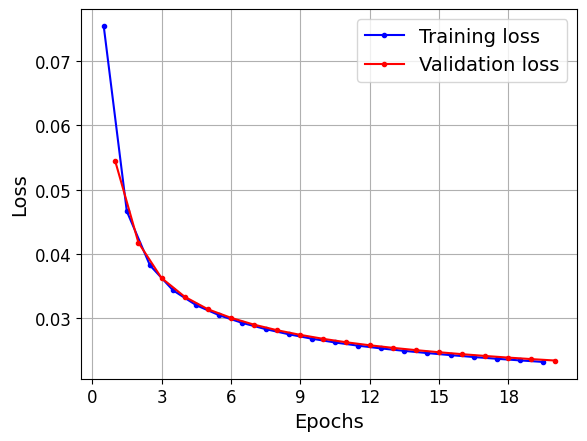

In [38]:
#-------------------------------------------------------------------------------
# observamos las curvas de aprendizaje del modelo-------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [39]:
#-------------------------------------------------------------------------------
# generamos una nueva serie de tiempo para testear el modelo--------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva sample--------------------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


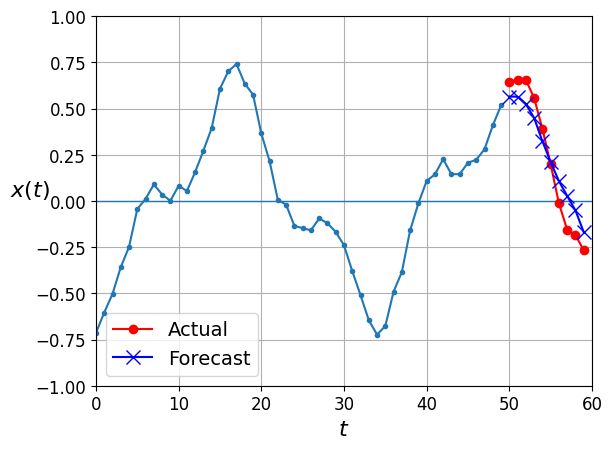

In [40]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Rendimientos similares a las RNN con horizonte lejano.
- Es preciso sintonizar número de capas e hiperparámetros para aprovechar todas las ventajas de LSTM.

In [41]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.2371345 %


# [GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be): Gated Recurrent Unit

- La GRU puede entenderse como una extensión de la capa LSTM para evitar problemas de convergencia en el gradiente.

$$\mathbf{R}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xr}+\mathbf{H}_{t-1}\mathbf{W}_{hr}+\mathbf{b}_r\right)$$
$$\mathbf{Z}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xz}+\mathbf{H}_{t-1}\mathbf{W}_{hz}+\mathbf{b}_z\right)$$
$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t\mathbf{W}_{xh}+(\mathbf{R}_t\odot\mathbf{H}_{t-1})\mathbf{W}_{hh}+\mathbf{b}_h)$$
$${\mathbf{H}}_t = \mathbf{Z}_t\odot\mathbf{H}_{t-1}+(1-\mathbf{Z}_t)\odot\tilde{\mathbf{H}}_t$$

donde $\mathbf{W}_{xh},\mathbf{W}_{xz},\mathbf{W}_{xh}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hr},\mathbf{W}_{hz},\mathbf{W}_{hh}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{r},\mathbf{b}_{z},\mathbf{b}_{h}\in\mathbb{R}^{h}$.

![gru](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/gru.png?raw=1)

- Si las entradas de $\mathbf{R}_t$ se acercan a 1, el modelo se convierte en una RNN simple. Para valores en $\mathbf{R}_t$ cercanos a 0, el estado oculto "candidato" se cácula como un MLP sobre $\mathbf{X}_t$, cualquier estado oculto anterior es "reseteado".

- Además, si los elementos de la compuerta de actualización $\mathbf{Z}_t$ son cercanos a 1, se mantiene el estado anterior en la capa, de lo contrario el nuevo estado $\mathbf{H}_t$ "acepta" el estado candidato $\tilde{\mathbf{H}}_t.$

- Lo anterior permite mitigar el efecto del desvanecimiento del gradiente de las RNN simples, codificando mejor dependencias en series con relaciones "relativamente grandes" en el tiempo.



In [42]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - last_time_step_mse: 0.0935 - loss: 0.0993 - val_last_time_step_mse: 0.0402 - val_loss: 0.0516
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - last_time_step_mse: 0.0388 - loss: 0.0490 - val_last_time_step_mse: 0.0319 - val_loss: 0.0436
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0324 - loss: 0.0431 - val_last_time_step_mse: 0.0281 - val_loss: 0.0403
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - last_time_step_mse: 0.0281 - loss: 0.0397 - val_last_time_step_mse: 0.0188 - val_loss: 0.0350
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0189 - loss: 0.0342 - val_last_time_step_mse: 0.0149 - val_loss: 0.0314
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - last_time_step_mse: 0.0150 - loss: 0.0310 - val_last_time_step_mse: 0.0133 - val_loss: 0.0294
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0133 - loss: 0.0291 - val_last_time_step

In [43]:
model.evaluate(X_valid, Y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - last_time_step_mse: 0.0082 - loss: 0.0221


[0.022137708961963654, 0.007989391684532166]

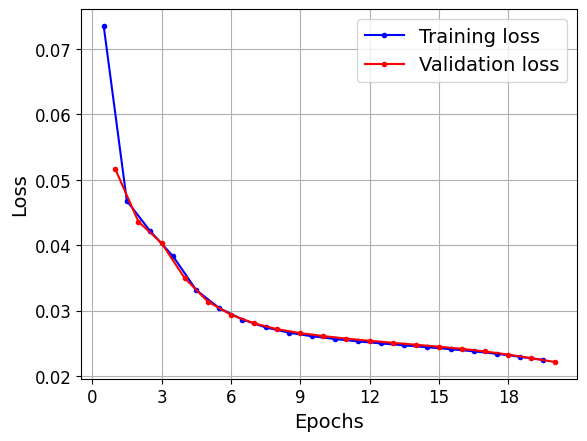

In [44]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [45]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


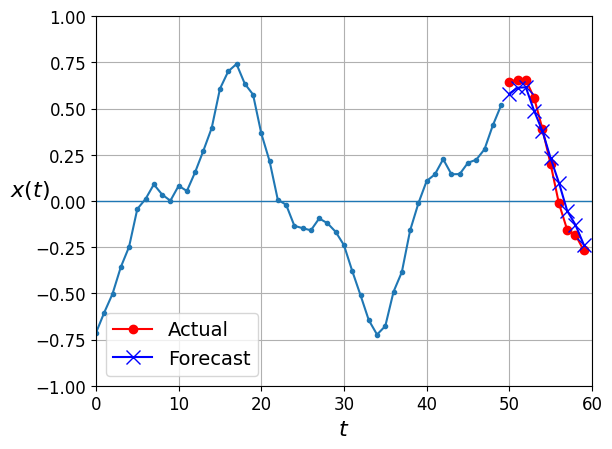

In [46]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [47]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.40906397 %


# Ejercicio 3:

- Consulte en qué consisten las capas Conv1D y cómo pueden aplicarse para modelar series temporales (Ver capa [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) y [ejemplo](https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html)).

- Realice una comparación entre las redes tipo RNN simple, LSTM, GRU y Conv1D en terminos de la capacidad de predicción en términos del mse y el mae, en los datos simulados para diferentes horizontes: $\{1,2,3,\dots,15\}$

### Ejercicio 3 – Capas Conv1D y su uso en series temporales

Una capa **Conv1D** aplica filtros convolucionales sobre una secuencia 1D. La entrada típica tiene forma `(longitud, n_features)`, donde cada paso temporal tiene un vector de características. La capa desplaza un **kernel** (ventana) a lo largo del eje temporal y, en cada posición, calcula una combinación lineal de los valores dentro de esa ventana, seguida de una función de activación. Matemáticamente, para un solo filtro se puede ver como:
\[
y_t = \sigma\left(\sum_{k=0}^{K-1} w_k \, x_{t-k} + b\right),
\]
donde \(K\) es el tamaño del kernel, \(w_k\) son los pesos del filtro, \(x_{t-k}\) son los valores de entrada en la ventana y \(\sigma\) es la activación.

En el contexto de **series temporales**, Conv1D sirve para detectar **patrones locales en el tiempo**: tendencias cortas, oscilaciones, picos o combinaciones de varias variables en ventanas de tiempo cercanas. Usando varios filtros en paralelo, la red puede aprender distintos “patrones típicos” que aparecen en la serie y combinarlos en capas posteriores. Además, se pueden usar convoluciones **causales** (donde la salida en el tiempo \(t\) solo depende de valores en tiempos \(\leq t\)) para respetar la dirección temporal y evitar “mirar el futuro” en la predicción.

Comparada con una RNN clásica, una Conv1D:
- Procesa la secuencia en paralelo (todas las posiciones a la vez), lo que suele ser más eficiente en GPU que recorrer la secuencia paso a paso.
- Tiende a capturar mejor patrones **locales** de tamaño fijo (definido por el kernel), mientras que las RNN/LSTM/GRU están diseñadas para manejar dependencias de largo plazo a través de su estado oculto.
- Se puede combinar en varias capas apiladas, de modo que los filtros de niveles superiores vean “ventanas efectivas” más grandes (receptive field mayor) sin necesidad de estados recurrentes.

Por eso, las capas **Conv1D** son una alternativa interesante para modelar series temporales cuando los patrones relevantes tienen una estructura local clara en el tiempo o cuando se busca un modelo más liviano y fácil de paralelizar que las redes recurrentes tradicionales.


### Comparación de arquitecturas RNN, LSTM, GRU y Conv1D para distintos horizontes

Para completar el Ejercicio 3 quiero comparar varias arquitecturas de redes para series temporales: RNN simple, LSTM, GRU y una red basada en Conv1D. La comparación se hará sobre los mismos datos simulados, utilizando el mismo generador `generate_time_series`, pero extendiendo el horizonte de predicción a {1, 2, ..., 15}. Para ello primero genero un nuevo conjunto de datos con salida multi-horizonte (hasta 15 pasos futuros) y luego defino funciones que construyen cada tipo de modelo con una salida de dimensión 15 en cada instante de tiempo. Finalmente, entrenaré cada modelo y calcularé el MSE y el MAE por horizonte, usando los valores en el último paso temporal de la ventana.


In [48]:
# === Datos para comparación multi-horizonte (hasta 15 pasos) ===

# Usamos el mismo generador generate_time_series definido antes,
# pero extendemos el horizonte máximo a 15.
max_horizon_comp = 15
n_steps_comp = 50
n_series_comp = 10000

np.random.seed(42)

# Serie más larga: 50 pasos de entrada + 15 pasos futuros
series_comp = generate_time_series(n_series_comp, n_steps_comp + max_horizon_comp)
print("series_comp shape:", series_comp.shape)

# Ventanas de entrada (igual que antes): primeros 50 pasos
X_train_c = series_comp[:7000, :n_steps_comp]
X_valid_c = series_comp[7000:9000, :n_steps_comp]
X_test_c  = series_comp[9000:, :n_steps_comp]

print("X_train_c:", X_train_c.shape)
print("X_valid_c:", X_valid_c.shape)
print("X_test_c :", X_test_c.shape)

# Salidas multi-horizonte (tipo Y: [batch, time, horizonte])
# Y_comp[b, t, h] = valor de la serie en el tiempo t + (h+1)
Y_comp = np.empty((n_series_comp, n_steps_comp, max_horizon_comp))

for step_ahead in range(1, max_horizon_comp + 1):
    # Para cada horizonte h: usamos un corrimiento hacia adelante
    Y_comp[..., step_ahead - 1] = series_comp[..., step_ahead:step_ahead + n_steps_comp, 0]

print("Y_comp shape:", Y_comp.shape)

# Partimos en train/valid/test
Y_train_c = Y_comp[:7000]
Y_valid_c = Y_comp[7000:9000]
Y_test_c  = Y_comp[9000:]

print("Y_train_c:", Y_train_c.shape)
print("Y_valid_c:", Y_valid_c.shape)
print("Y_test_c :", Y_test_c.shape)


series_comp shape: (10000, 65, 1)
X_train_c: (7000, 50, 1)
X_valid_c: (2000, 50, 1)
X_test_c : (1000, 50, 1)
Y_comp shape: (10000, 50, 15)
Y_train_c: (7000, 50, 15)
Y_valid_c: (2000, 50, 15)
Y_test_c : (1000, 50, 15)


In [50]:
# === Funciones auxiliares para construir y evaluar modelos ===

# 1) Constructores de modelos: todos devuelven salida (batch, time, max_horizon_comp)

def build_simple_rnn_model_comp():
    model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(max_horizon_comp))
    ])
    model.compile(loss="mse", optimizer="adam")
    return model


def build_lstm_model_comp():
    model = keras.models.Sequential([
        keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(max_horizon_comp))
    ])
    model.compile(loss="mse", optimizer="adam")
    return model


def build_gru_model_comp():
    model = keras.models.Sequential([
        keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.GRU(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(max_horizon_comp))
    ])
    model.compile(loss="mse", optimizer="adam")
    return model


def build_conv1d_model_comp():
    # Modelo puramente convolucional 1D que produce (time, max_horizon_comp)
    model = keras.models.Sequential([
        keras.layers.Conv1D(filters=32, kernel_size=3,
                            activation="relu", padding="causal",
                            input_shape=[None, 1]),
        keras.layers.Conv1D(filters=32, kernel_size=3,
                            activation="relu", padding="causal"),
        # Esta conv 1x1 mapea los 32 canales a max_horizon_comp canales (una especie de Dense temporal)
        keras.layers.Conv1D(filters=max_horizon_comp, kernel_size=1)
    ])
    model.compile(loss="mse", optimizer="adam")
    return model


# 2) Función para entrenar un modelo y devolver MSE y MAE por horizonte
def train_and_evaluate_model(builder_fn, model_name, epochs=20, batch_size=32):
    """
    Entrena el modelo construido por builder_fn usando (X_train_c, Y_train_c),
    evalúa sobre X_test_c, Y_test_c y devuelve:
    - mse_per_h: vector de tamaño max_horizon_comp con el MSE por horizonte (1..max_horizon_comp)
    - mae_per_h: vector de tamaño max_horizon_comp con el MAE por horizonte
    """
    print(f"\nEntrenando modelo {model_name}...")
    model = builder_fn()

    history = model.fit(
        X_train_c, Y_train_c,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_valid_c, Y_valid_c),
        verbose=0
    )

    # Predicción sobre el conjunto de test
    Y_pred_c = model.predict(X_test_c, verbose=0)

    # Tomamos solo el último paso temporal de la ventana
    # Y_true_last / Y_pred_last: shape (N_test, max_horizon_comp)
    Y_true_last = Y_test_c[:, -1, :]
    Y_pred_last = Y_pred_c[:, -1, :]

    # MSE y MAE por horizonte (promediando sobre muestras)
    mse_per_h = np.mean((Y_true_last - Y_pred_last) ** 2, axis=0)
    mae_per_h = np.mean(np.abs(Y_true_last - Y_pred_last), axis=0)

    return mse_per_h, mae_per_h, history


### Resultados de la comparación: RNN, LSTM, GRU y Conv1D

En esta sección entreno cuatro arquitecturas diferentes (RNN simple, LSTM, GRU y Conv1D) sobre los datos simulados con horizonte máximo de 15 pasos hacia adelante. Para cada modelo calculo el error cuadrático medio (MSE) y el error absoluto medio (MAE) en el último paso temporal de la ventana, para cada horizonte \(\{1,2,\dots,15\}\). Con esto obtengo un perfil de desempeño que permite comparar qué tipo de red se comporta mejor para predicciones a corto y a más largo plazo.


In [51]:
# === Entrenar y evaluar RNN, LSTM, GRU y Conv1D para horizontes 1..15 ===

import pandas as pd

model_builders = {
    "SimpleRNN": build_simple_rnn_model_comp,
    "LSTM":      build_lstm_model_comp,
    "GRU":       build_gru_model_comp,
    "Conv1D":    build_conv1d_model_comp
}

results = []

for name, builder in model_builders.items():
    mse_per_h, mae_per_h, history = train_and_evaluate_model(
        builder_fn=builder,
        model_name=name,
        epochs=20,       # puedes bajar a 10 si se demora mucho
        batch_size=32
    )

    horizons = np.arange(1, max_horizon_comp + 1)

    for h, mse_h, mae_h in zip(horizons, mse_per_h, mae_per_h):
        results.append({
            "model": name,
            "horizon": int(h),
            "mse": float(mse_h),
            "mae": float(mae_h)
        })

df_results = pd.DataFrame(results)
df_results.head()



Entrenando modelo SimpleRNN...



Entrenando modelo LSTM...

Entrenando modelo GRU...

Entrenando modelo Conv1D...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,model,horizon,mse,mae
0,SimpleRNN,1,0.002783,0.042695
1,SimpleRNN,2,0.004958,0.057541
2,SimpleRNN,3,0.007165,0.068537
3,SimpleRNN,4,0.009821,0.079745
4,SimpleRNN,5,0.011056,0.083717


In [52]:
# === Tabla resumen por horizonte y modelo ===

# Tabla de MSE por horizonte (filas) y modelo (columnas)
mse_table = df_results.pivot(index="horizon", columns="model", values="mse")
mae_table = df_results.pivot(index="horizon", columns="model", values="mae")

print("MSE por horizonte y modelo:")
display(mse_table)

print("\nMAE por horizonte y modelo:")
display(mae_table)


MSE por horizonte y modelo:


model,Conv1D,GRU,LSTM,SimpleRNN
horizon,,,,
1,0.003193,0.003190,0.002932,0.002783
2,0.008708,0.004948,0.004382,0.004958
3,0.018595,0.007256,0.006082,0.007165
4,0.032935,0.009217,0.007324,0.009821
5,0.047332,0.010166,0.007852,0.011056
6,0.058490,0.010134,0.007500,0.011560
7,0.065103,0.009727,0.007838,0.011699
8,0.064149,0.011392,0.009153,0.013924
9,0.061474,0.014469,0.012196,0.016288



MAE por horizonte y modelo:


model,Conv1D,GRU,LSTM,SimpleRNN
horizon,,,,
1,0.045838,0.045117,0.043484,0.042695
2,0.073325,0.056469,0.053353,0.057541
3,0.105748,0.068576,0.063178,0.068537
4,0.140088,0.076292,0.069214,0.079745
5,0.167285,0.080705,0.071608,0.083717
6,0.186112,0.081688,0.070206,0.085817
7,0.198320,0.079054,0.070880,0.086801
8,0.199197,0.087281,0.077835,0.097685
9,0.195638,0.098686,0.091232,0.106594


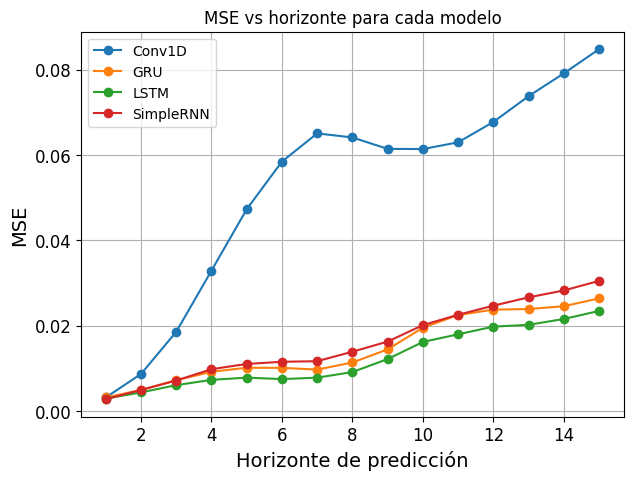

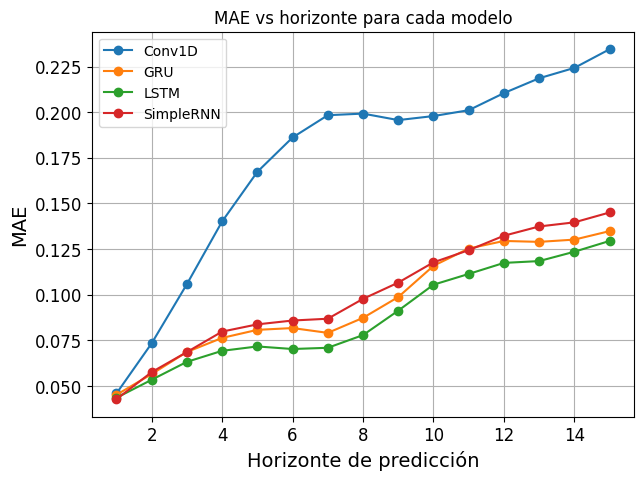

In [53]:
# === Gráficas MSE y MAE vs horizonte ===

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
for model_name in mse_table.columns:
    plt.plot(mse_table.index, mse_table[model_name], marker="o", label=model_name)
plt.xlabel("Horizonte de predicción")
plt.ylabel("MSE")
plt.title("MSE vs horizonte para cada modelo")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
for model_name in mae_table.columns:
    plt.plot(mae_table.index, mae_table[model_name], marker="o", label=model_name)
plt.xlabel("Horizonte de predicción")
plt.ylabel("MAE")
plt.title("MAE vs horizonte para cada modelo")
plt.legend()
plt.grid(True)
plt.show()


### Comentario sobre la comparación de modelos

A partir de las gráficas de MSE y MAE se ve que, para horizontes muy cortos (1–2 pasos), los cuatro modelos tienen errores similares, pero a medida que el horizonte de predicción aumenta aparecen diferencias claras. En particular, la red basada en **Conv1D** es la que peor se comporta: su MSE y MAE crecen mucho más rápido que en las arquitecturas recurrentes, lo que indica que en estos datos simulados no está capturando bien las dependencias necesarias para predecir varios pasos hacia adelante.

Entre las redes recurrentes, la **LSTM** es la que obtiene los menores errores casi en todos los horizontes, seguida muy de cerca por la **GRU**. La **RNN simple** siempre queda por encima de LSTM y GRU, y la brecha se hace más evidente cuando el horizonte crece, lo que concuerda con la idea de que la RNN simple tiene más dificultades para manejar dependencias de largo plazo por problemas de desvanecimiento del gradiente.

En resumen, en estos experimentos:
- Para horizontes cortos todos los modelos son competitivos, pero la ventaja de LSTM/GRU se empieza a notar a partir de horizontes medios.
- **LSTM** y **GRU** resultan claramente más robustas que la RNN simple cuando se incrementa el horizonte de predicción.
- La arquitectura **Conv1D** se queda rezagada para horizontes mayores, lo que sugiere que, en esta serie temporal concreta, las dependencias relevantes no son solo locales y las celdas recurrentes (LSTM/GRU) aprovechan mejor la información a largo plazo.
